In [1]:
#Importing Some Important libraries
import numpy as np
import pandas as pd

# **Data Collection and Analysis**

In [2]:
df = pd.read_csv('/content/diabetes.csv') 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='Glucose'>

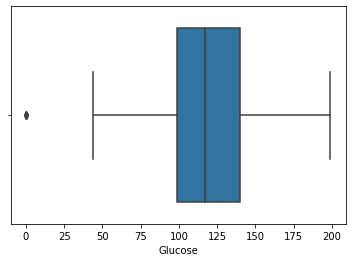

In [7]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='Pregnancies'>

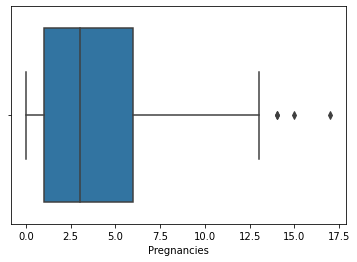

In [8]:
sns.boxplot(x=df['Pregnancies'])

<Axes: xlabel='Insulin'>

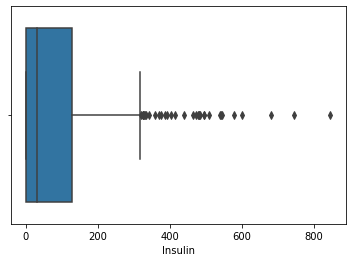

In [9]:
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='BloodPressure'>

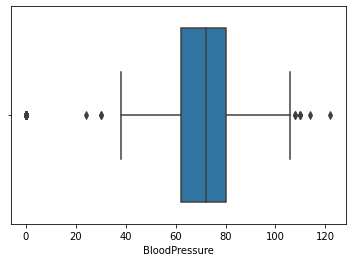

In [10]:
sns.boxplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness'>

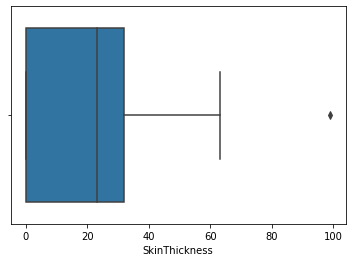

In [11]:
sns.boxplot(x=df['SkinThickness'])

In [12]:
#so we got some outlier values in the Glucose, BloodPressure and SkinThickness columns, we'll try to handle them.
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(99, df['SkinThickness'].median())

<Axes: xlabel='BloodPressure'>

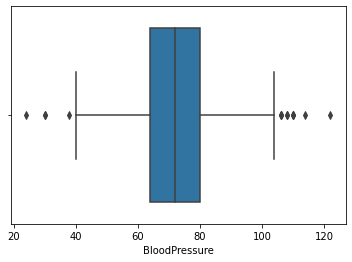

In [13]:
sns.boxplot(x=df['BloodPressure'])

<Axes: xlabel='Glucose'>

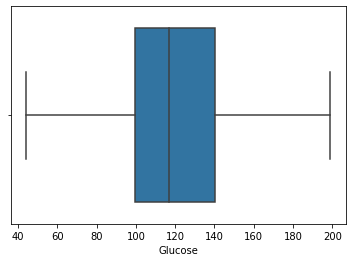

In [14]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='SkinThickness'>

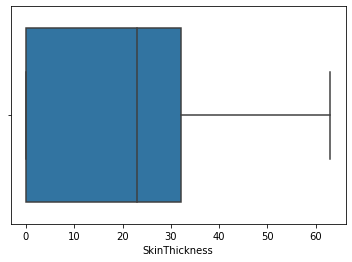

In [15]:
sns.boxplot(x=df['SkinThickness'])

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [17]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,142.130597,75.123134,21.880597,100.335821,35.142537,0.550500,37.067164


# **Splitting the DF**

**Splitting The Data and The Labels**

In [18]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [19]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [20]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Splitting to Train & Test**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=47)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **Models Training**

**Training the data on SVM**

In [24]:
from sklearn import svm

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Training the data on Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200,random_state=47)

In [29]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=47)

# **Model Evaluation**

Accuracy Score for SVM

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
X_test_prediction_svm = classifier.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)
print('Accuracy score of the SVM model : ', test_data_accuracy_svm)

Accuracy score of the SVM model :  0.7597402597402597


Accuracy Score for Random Forest Classifier

In [32]:
X_test_prediction_rfc = rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
print('Accuracy score of the Random Forest Classifier model : ', test_data_accuracy_rfc)

#I will try different values for 'n_estimators' manually
#100  0.7337662337662337
#200  0.7792207792207793
#300  0.7727272727272727
#400  0.7532467532467533
#500  0.7597402597402597
#600  0.7597402597402597
#700  0.7532467532467533
#so I got the best evaluation when n_estimators value was 200, max depth value as 15.

Accuracy score of the Random Forest Classifier model :  0.7792207792207793


So Basicly I chose the random forest classifier because it has scored a better accuracy.






---



# **Saving My trained-model**

In [33]:
import pickle

In [34]:
filename = 'diabetes_model.sav'
pickle.dump(rfc, open(filename, 'wb'))